In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as SklearnKMeans
from k_means import KMeans

In [5]:
df = pd.read_csv("../data/adm_data.csv", index_col=[0])
X = df.drop(["Chance of Admit "], axis=1)
y = df[["Chance of Admit "]]

X_orig = X.copy()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [6]:
X_scaled.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
2,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
3,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112


### With two variables

In [7]:
k_two_variables = 3

In [8]:
X_kmeans = X_orig[["GRE Score", "CGPA"]].copy()
X_scaled_kmeans = X_scaled[["GRE Score", "CGPA"]]
kmeans = KMeans(k=k_two_variables, max_iter=100, tol=1e-4, random_state=0)
kmeans.fit(X_scaled_kmeans.copy())
X_kmeans["Cluster"] = kmeans.clusters

In [9]:
kmeans.clusters.value_counts()

0    163
2    144
1     93
Name: count, dtype: int64

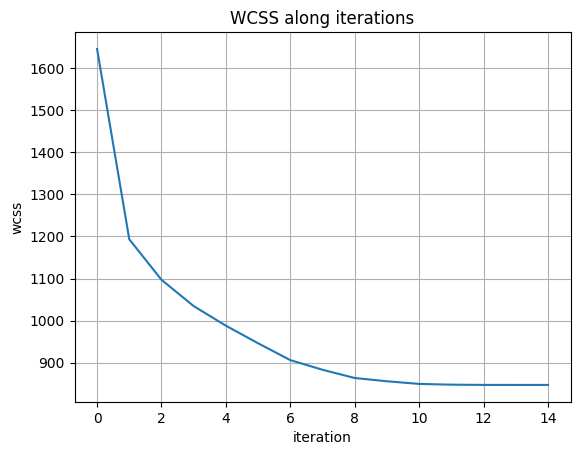

In [27]:
ax = sns.lineplot(kmeans.wcss)
ax.set_title("WCSS along iterations")
ax.set_xlabel("iteration")
ax.set_ylabel("wcss")
ax.grid()

<Axes: xlabel='GRE Score', ylabel='CGPA'>

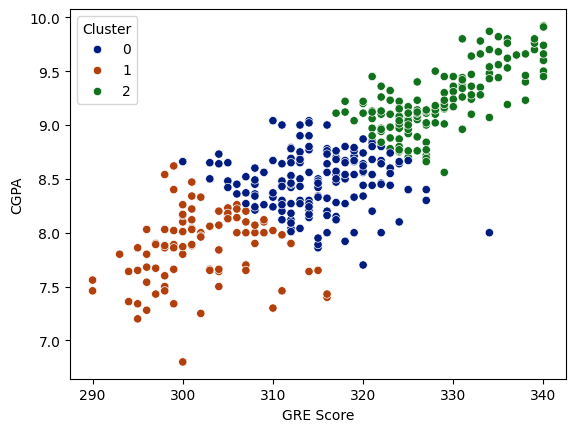

In [52]:
sns.scatterplot(X_kmeans, x="GRE Score", y="CGPA", hue="Cluster", palette="dark")

In [54]:
X_sk = X_orig[["GRE Score", "CGPA"]].copy()
X_scaled_sk = X_scaled[["GRE Score", "CGPA"]].copy()
sk = SklearnKMeans(n_clusters=k_two_variables, random_state=0, init="random", n_init=1, max_iter=100, tol=1e-4)
sk.fit(X_scaled_sk)
X_sk["Cluster"] = sk.labels_

In [55]:
pd.Series(sk.labels_).value_counts()

0    163
1    144
2     93
Name: count, dtype: int64

In [56]:
sk.inertia_

193.00612788914444

<Axes: xlabel='GRE Score', ylabel='CGPA'>

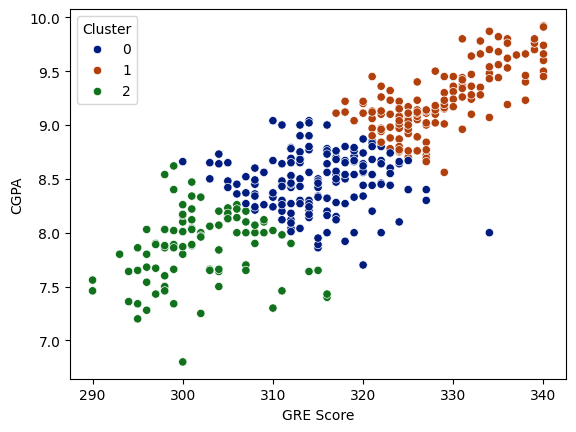

In [10]:
sns.scatterplot(X_sk, x="GRE Score", y="CGPA", hue="Cluster", palette="dark")

### With all variables

In [12]:
kmeans = KMeans(k=5, max_iter=100, tol=1e-4, random_state=0)
kmeans.fit(X_scaled)
kmeans.clusters.value_counts().sort_index()

0     63
1    102
2     94
3     47
4     94
Name: count, dtype: int64

In [14]:
kmeans.centroids

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
cluster,,,,,,,
0,-0.224220,0.060670,0.117940,0.359886,0.300575,0.056175,-1.099975
1,0.268328,0.174959,0.034974,0.109191,0.020157,0.111273,0.909112
2,1.217162,1.188900,1.227230,1.109733,1.036914,1.276283,0.844992
3,-1.446289,-1.432977,-1.268673,-1.476822,-1.428965,-1.555434,-0.886242
4,-0.634907,-0.702923,-0.709889,-0.731006,-0.545754,-0.656958,-0.651136


In [19]:
kmeans.wcss

[1645.566619524856,
 1193.3343537966796,
 1097.0984428437982,
 1034.588208530773,
 987.9720481371437,
 946.2686640208514,
 906.2210954249642,
 883.3662901534949,
 863.7673207858257,
 855.9958557953208,
 849.7402354554802,
 847.9383658287388,
 847.3770060051761,
 847.3364239324958,
 847.3364239324958]

In [16]:
sk = SklearnKMeans(n_clusters=5, random_state=0, init="random", n_init=1, max_iter=100, tol=1e-4)
sk.fit(X_scaled)
pd.Series(sk.labels_).value_counts().sort_index()

0     66
1     94
2     91
3    102
4     47
Name: count, dtype: int64

In [17]:
sk.cluster_centers_

array([[-0.26350846,  0.01734623,  0.09583291,  0.38571521,  0.28087636,
        -0.00328307, -1.09997489],
       [ 1.21716205,  1.18890034,  1.22722987,  1.10973266,  1.03691407,
         1.27628319,  0.84499188],
       [-0.61995116, -0.69667454, -0.72114636, -0.78570267, -0.55936753,
        -0.63734499, -0.63633953],
       [ 0.26832828,  0.17495907,  0.03497423,  0.10919144,  0.02015731,
         0.11127314,  0.90911166],
       [-1.44628944, -1.43297712, -1.26867303, -1.47682249, -1.42896515,
        -1.5554341 , -0.88624227]])

In [18]:
sk.inertia_

847.226460621475